### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

### Checking the versions of the packages imported

In [2]:
import numpy
import matplotlib
print('numpy:',numpy.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
print('matplotlib:',matplotlib.__version__)


numpy: 1.16.5
pandas: 0.25.1
seaborn: 0.9.0
matplotlib: 3.1.1


### Importing the dataset

In [3]:
df = pd.read_csv('data/Onion Prices 2020.csv')
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/01/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/2020,1320,4050,3300.0


In [4]:
df.shape

(107295, 9)

In [5]:
data=df.head(15000)
data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/01/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/2020,1320,4050,3300.0
...,...,...,...,...,...,...,...,...,...
14995,Karnataka,Belgaum,Belgaum,Onion,Pusa-Red,24/05/2020,350,800,650.0
14996,Karnataka,Belgaum,Belgaum,Onion,Pusa-Red,27/05/2020,300,950,750.0
14997,Karnataka,Belgaum,Belgaum,Onion,Pusa-Red,28/05/2020,350,850,700.0
14998,Karnataka,Belgaum,Belgaum,Onion,Pusa-Red,29/05/2020,350,850,700.0


### Data information

In [6]:
data.shape

(15000, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
state           15000 non-null object
district        15000 non-null object
market          15000 non-null object
commodity       15000 non-null object
variety         15000 non-null object
arrival_date    15000 non-null object
min_price       15000 non-null int64
max_price       15000 non-null int64
modal_price     15000 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 1.0+ MB


In [8]:
data['variety'].value_counts()

Other               9502
Onion               3382
Local                948
Red                  260
White                235
Nasik                190
1st Sort             180
Puna                 179
Pusa-Red             121
Beelary-Red            2
Bangalore-Samall       1
Name: variety, dtype: int64

In [9]:
numeric_cols = data.select_dtypes(exclude='number')
data.drop(numeric_cols, axis=1, inplace=True)
data

C:\Users\Vaishnavi Batchu\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,min_price,max_price,modal_price
0,1350,4390,3100.0
1,1390,4400,3200.0
2,1460,5150,4310.0
3,2010,5200,4200.0
4,1320,4050,3300.0
...,...,...,...
14995,350,800,650.0
14996,300,950,750.0
14997,350,850,700.0
14998,350,850,700.0


### Data Splitting

In [10]:
x =data.loc[:,data.columns!='modal_price']

In [11]:
y= data['modal_price']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train,y_train)
model.score(x_test,y_test)*100
model.predict(x_test)
y_pred=model.predict(x_test)
acc1 = model.score(x_test,y_test)*100
acc1

98.9186921524989

In [14]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(x_train,y_train)
model.score(x_test,y_test)*100
model.predict(x_test)
y_pred=model.predict(x_test)
acc3 = model.score(x_test,y_test)*100
acc3

98.9119822348689

### GradientBosstingRegressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor().fit(x_train,y_train)
model.score(x_test,y_test)*100
model.predict(x_test)
y_pred=model.predict(x_test)
acc2 = model.score(x_test,y_test)*100
acc2

98.98091258408856

### RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(x_train,y_train)
model.score(x_test,y_test)*100
model.predict(x_test)
y_pred=model.predict(x_test)
acc3 = model.score(x_test,y_test)*100
acc3

98.91412021661944

### DecisionTreeRegressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor().fit(x_train,y_train)
model.score(x_test,y_test)*100
model.predict(x_test)
y_pred=model.predict(x_test)
acc4 = model.score(x_test,y_test)*100
acc4

98.79464677711209

### Support Vector Regressor

In [18]:
from sklearn.svm import SVR
model=DecisionTreeRegressor().fit(x_train,y_train)
model.score(x_test,y_test)*100
model.predict(x_test)
y_pred=model.predict(x_test)
acc5 = model.score(x_test,y_test)*100
acc5

98.70792245585982

### Comparsion

In [19]:
#make variabel for save the result and to show it
classifier = ('Linear Regression','Gradient Boosting Regeressor','Random Forest Regeressor','Decision Tree Regeressor','SVR')
y_pos = np.arange(len(classifier))
score = [acc1,acc2,acc3,acc4,acc5]
print(y_pos)
print(score)

[0 1 2 3 4]
[98.9186921524989, 98.98091258408856, 98.91412021661944, 98.79464677711209, 98.70792245585982]


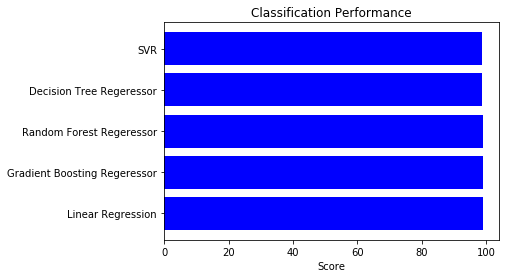

In [20]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=1,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()